In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Load the dataset
df = pd.read_csv("../src/Data/raw_analyst_ratings.csv")

In [4]:

# Clean column names
df.columns = df.columns.str.strip().str.lower()


In [5]:
# Check column names
print(df.columns)

Index(['unnamed: 0', 'headline', 'url', 'publisher', 'date', 'stock'], dtype='object')


In [6]:
# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [7]:
# Set 'date' as the index
df = df.set_index('date')

# Resample data by day
daily_publication = df.resample('D').size()

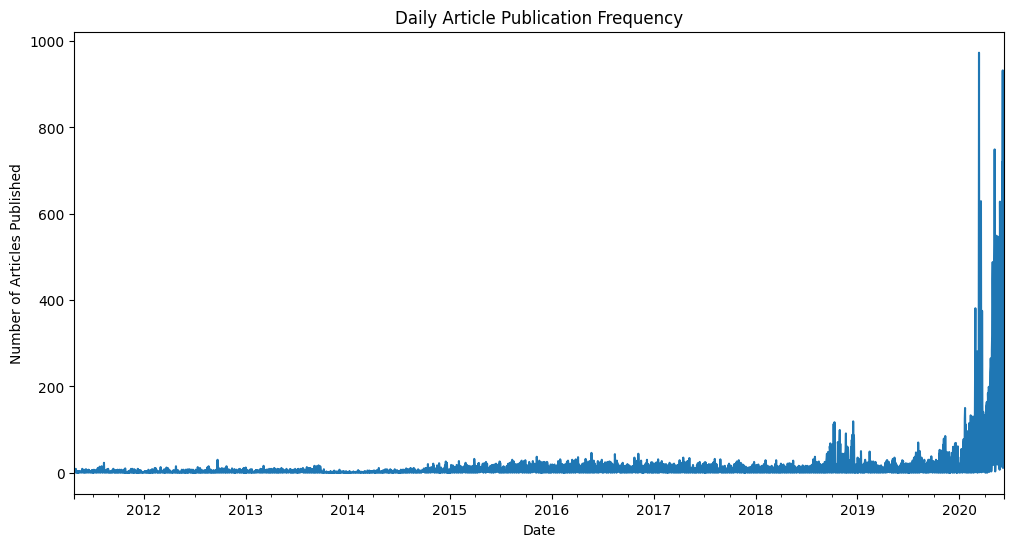

In [8]:
# Plot daily trends
plt.figure(figsize=(12, 6))
daily_publication.plot(title='Daily Article Publication Frequency', color='tab:blue')
plt.xlabel('Date')
plt.ylabel('Number of Articles Published')
plt.show()


In [9]:
# 2. Analyze monthly trends
monthly_publication = df.resample('M').size()

C:\Users\Administrator.MMCY\AppData\Local\Temp\ipykernel_11896\297578876.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_publication = df.resample('M').size()


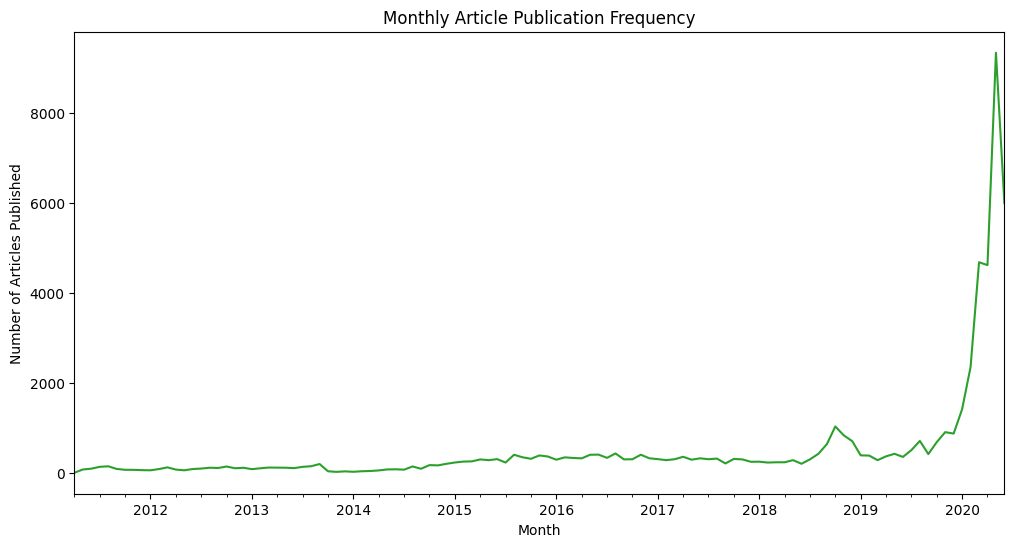

In [10]:
# Plot monthly trends
plt.figure(figsize=(12, 6))
monthly_publication.plot(title='Monthly Article Publication Frequency', color='tab:green')
plt.xlabel('Month')
plt.ylabel('Number of Articles Published')
plt.show()

In [11]:
# 3. Detect specific times when most articles are published (hourly analysis)
df['hour'] = df.index.hour  # Extract the hour from the datetime index
hourly_publication = df.groupby('hour').size()

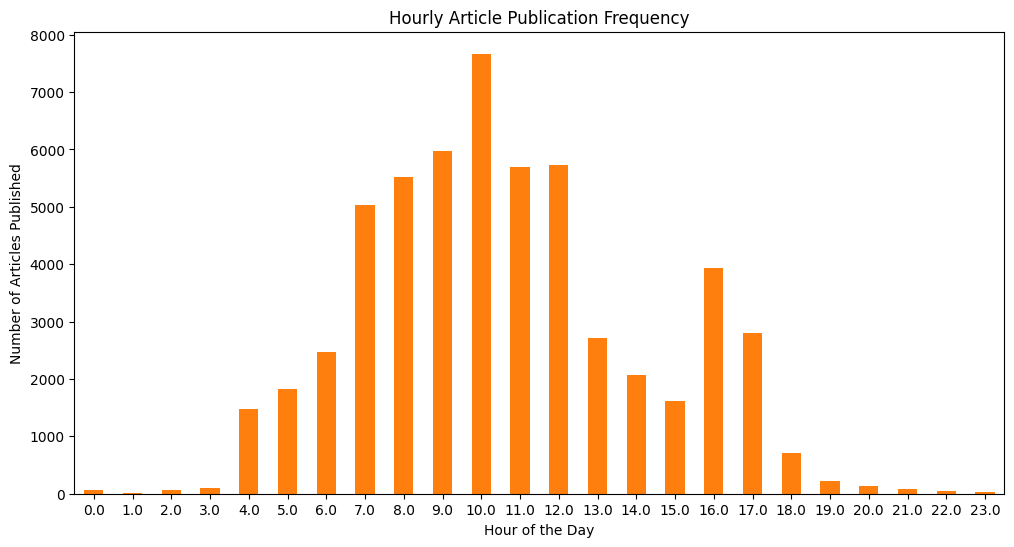

In [12]:
# Plot hourly trends
plt.figure(figsize=(12, 6))
hourly_publication.plot(kind='bar', title='Hourly Article Publication Frequency', color='tab:orange')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Articles Published')
plt.xticks(rotation=0)
plt.show()

In [13]:
# 4. Identify spikes in publication (top N days with the most articles)
top_days = daily_publication.sort_values(ascending=False).head(10)
print("Top 10 Days with the Most Articles Published:")
print(top_days)

Top 10 Days with the Most Articles Published:
date
2020-03-12 00:00:00-04:00    973
2020-06-05 00:00:00-04:00    932
2020-06-10 00:00:00-04:00    806
2020-06-09 00:00:00-04:00    804
2020-06-08 00:00:00-04:00    765
2020-05-07 00:00:00-04:00    749
2020-06-03 00:00:00-04:00    720
2020-03-19 00:00:00-04:00    629
2020-05-26 00:00:00-04:00    628
2020-05-13 00:00:00-04:00    549
dtype: int64


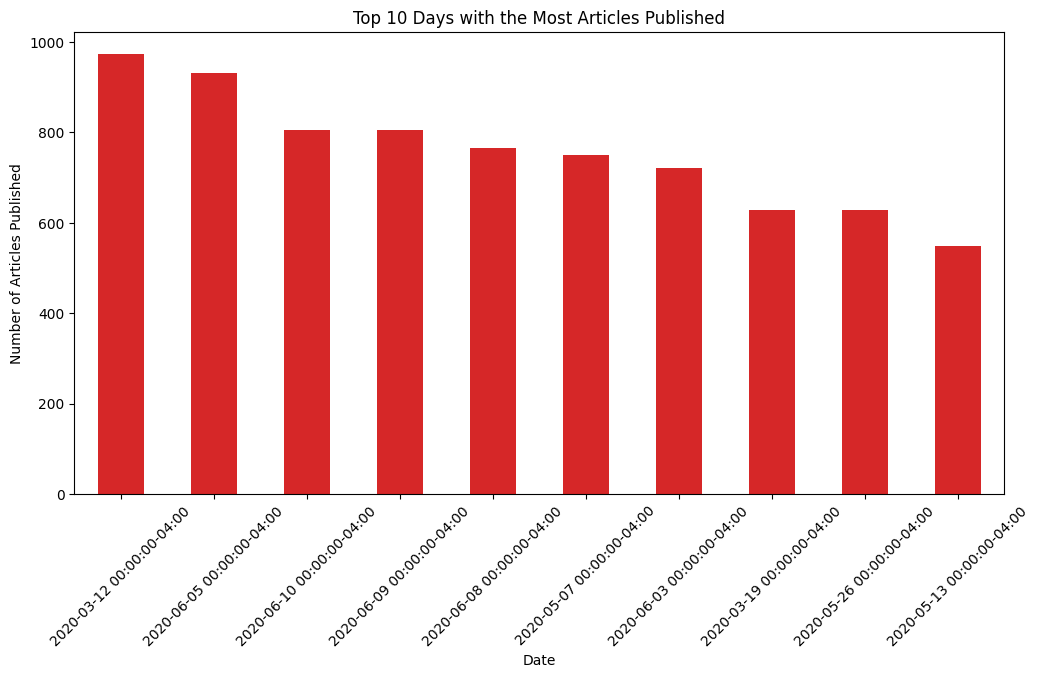

In [14]:
# Optional: Plot spikes
plt.figure(figsize=(12, 6))
top_days.plot(kind='bar', title='Top 10 Days with the Most Articles Published', color='tab:red')
plt.xlabel('Date')
plt.ylabel('Number of Articles Published')
plt.xticks(rotation=45)
plt.show()